https://colab.research.google.com/github/mepky/image_processing-opencv-/blob/master/Assignment.ipynb

In [1]:
%matplotlib inline

In [2]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract

In [3]:
#!sudo apt install poppler-utils

In [4]:
# https://www.geeksforgeeks.org/convert-pdf-to-image-using-python/
#!pip install pdf2image

In [5]:
import pandas as pd
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [6]:
import matplotlib.pyplot as plt
import cv2

In [7]:
#from google.colab.patches import cv2_imshow
from cv2_plt_imshow import cv2_plt_imshow, plt_format

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
# import module
from pdf2image import convert_from_path

#path2pdf = '/content/drive/MyDrive/Data/IMG_0002.pdf' 
#path2pdf ='/content/drive/MyDrive/Data/file_redacted.pdf'
path2pdf ='file_redacted.pdf'
import os
cwd = os.getcwd()
path2folder = cwd
#path2folder =  '/content/drive/MyDrive/Data/Images/' 
# Store Pdf with convert_from_path function
images = convert_from_path(path2pdf)

In [10]:
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save(path2folder + '/' + 'page'+ str(i) +'.jpg', 'JPEG')

In [11]:
path2image = cwd + "/page0.jpg"

In [12]:
im = cv2.imread(path2image)##, cv2.IMREAD_COLOR)

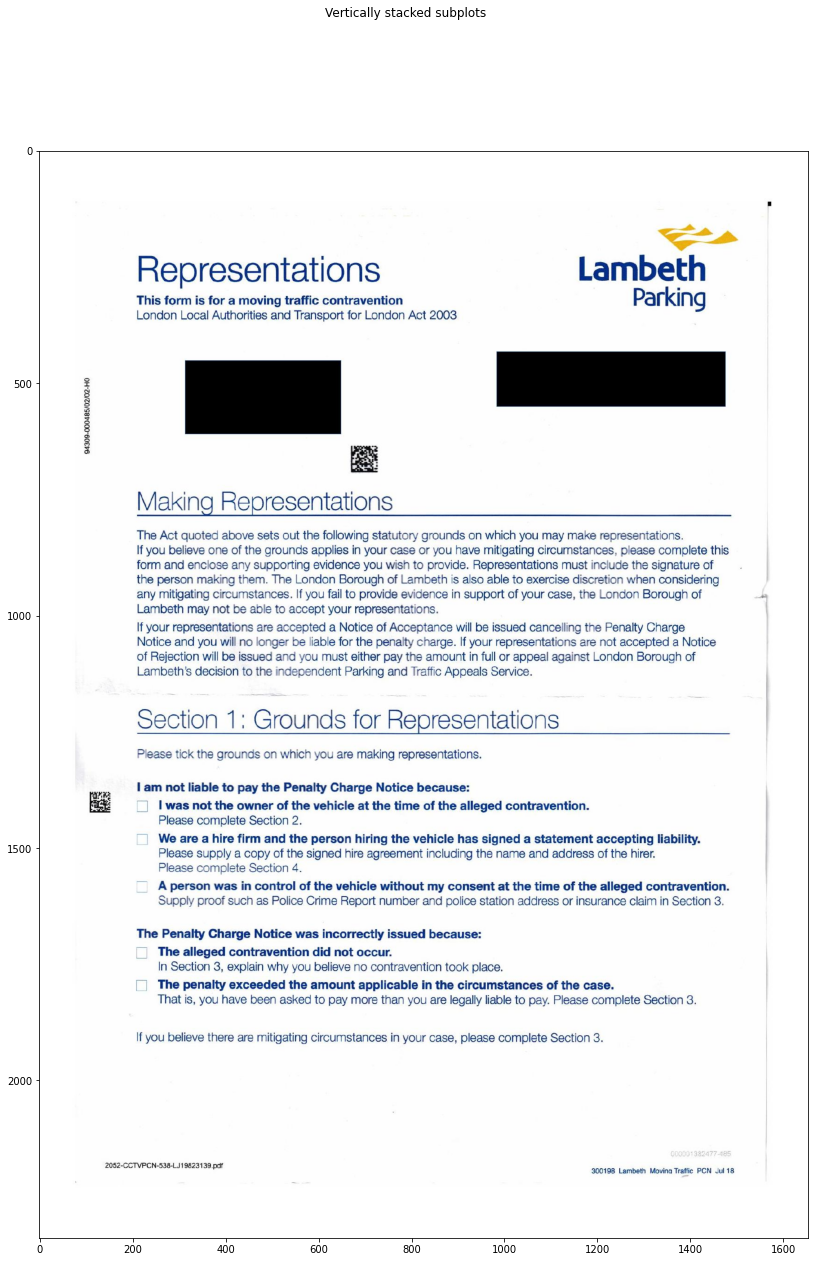

In [13]:
#im = cv2.bitwise_not(im)
#im = cv2.bitwise_not(im)
#plt.imshow(im)
#plt.show()
#cv2_imshow(im)
#cv2_plt_imshow(im)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(im))

In [14]:
os.environ["TESSDATA_PREFIX"] = cwd

In [15]:
image_path_in_colab=path2image
extract = pytesseract.image_to_string(Image.open(image_path_in_colab))
#print(extract)
#type(extract)

In [16]:
#extract=''.join(extract)
#type(extract)

In [17]:
#extract=extract.split('\n')

#extract

In [18]:
#l=list()
#for i in extract:
#  if i!='' and i!=' ':
#    l.append(i)
#l


In [19]:
#import pandas as pd

In [20]:
#column=l[8].split(' ')

In [21]:
filename = path2image

# read the image and get the dimensions
img = cv2.imread(filename)
h, w, _ = img.shape # assumes color image

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img,config = " -c tessedit_create_boxfile=1" ) # also include any config options you use
boxes

'9 1654 0 1654 0 0\n4 1654 0 1654 0 0\n3 1654 0 1654 0 0\n0 1654 0 1654 0 0\n9 1654 0 1654 0 0\n- 1654 0 1654 0 0\n0 1654 0 1654 0 0\n0 1654 0 1654 0 0\n0 1654 0 1654 0 0\n4 1654 0 1654 0 0\n8 1654 0 1654 0 0\n5 1654 0 1654 0 0\n/ 1654 0 1654 0 0\n0 1654 0 1654 0 0\n2 1654 0 1654 0 0\n/ 1654 0 1654 0 0\n0 1654 0 1654 0 0\n2 1654 0 1654 0 0\n- 1654 0 1654 0 0\nH 1654 0 1654 0 0\nO 1654 0 1654 0 0\n. 607 2103 612 2111 0\n. 1331 2122 1504 2179 0\nR 214 2056 257 2112 0\ne 229 2037 296 2116 0\np 262 2055 298 2097 0\nr 303 2041 339 2097 0\ne 346 2055 402 2097 0\ns 406 2055 438 2097 0\ne 407 2037 474 2116 0\nn 442 2055 478 2097 0\nt 483 2056 516 2097 0\na 519 2055 580 2108 0\nt 552 2037 605 2116 0\ni 581 2056 612 2108 0\no 619 2055 657 2097 0\nn 663 2056 695 2097 0\ns 701 2055 733 2097 0\nL 1162 2058 1190 2110 0\na 1192 2058 1226 2099 0\nm 1231 2058 1288 2098 0\nb 1243 2057 1323 2114 0\ne 1291 2057 1328 2114 0\nt 1331 2057 1367 2098 0\nh 1371 2057 1433 2114 0\nT 210 2007 226 2026 0\nh 214 200

In [22]:
for b in boxes.splitlines():
    b = b.split(' ')
    

In [23]:

# draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


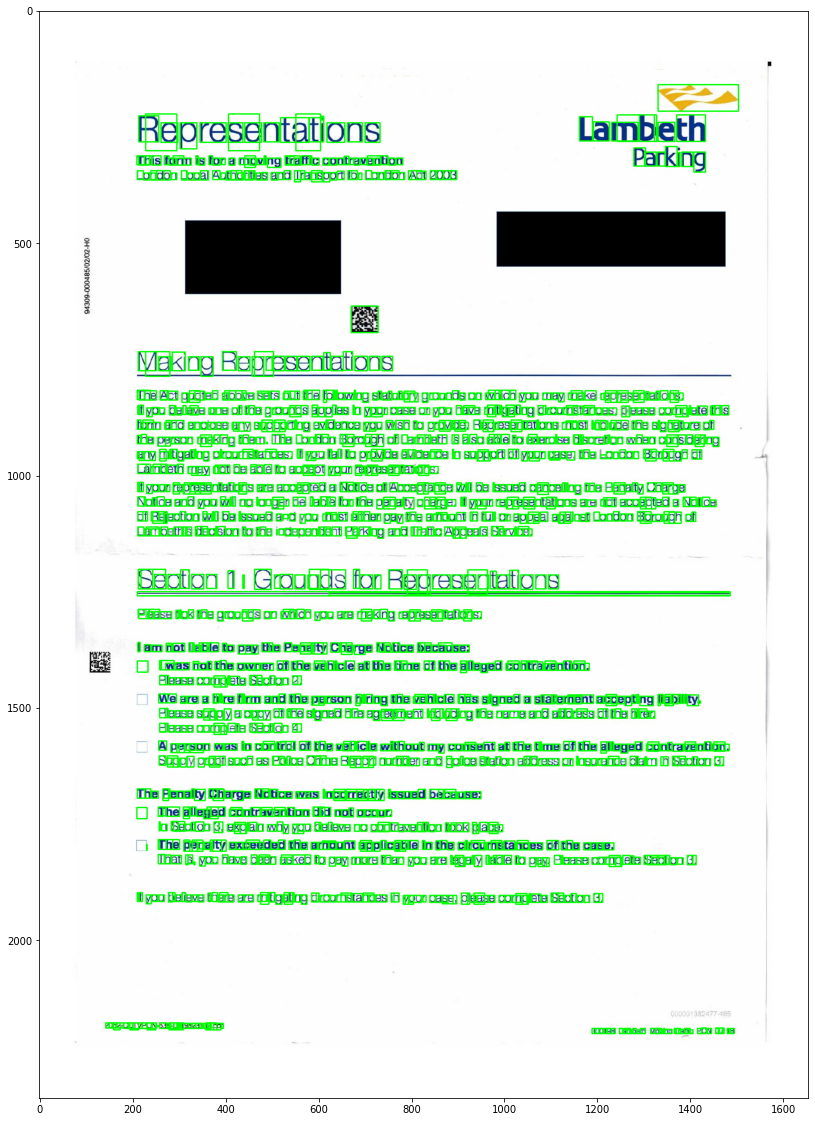

In [24]:
# show annotated image and wait for keypress
#cv2.imshow(filename, img)
#cv2.waitKey(0)

#im = cv2.bitwise_not(img)
#plt.figure(figsize=(20, 20))
#plt.imshow(img)
#plt.show()
#cv2_plt_imshow(img)
fig, axs = plt.subplots(1 , figsize=(20,20))
axs.imshow(plt_format(img))

In [25]:

from pytesseract import Output

filename = path2image

image = cv2.imread(filename)
#rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#results = pytesseract.image_to_data(rgb, output_type=Output.DICT)
#config = ('- 1 eng -- oem 3 -- psm 3') # Note that it is double “-” for oem and psm
#data = pytesseract.image_to_data(grey_image, config = config, output_type='data.frame')
data = pytesseract.image_to_data(grey_image,lang='eng', output_type='data.frame')
data = data[pd.notna(data['text'])]
data['right'] = data['left'] + data['width']
data['bottom'] = data['top'] + data['height']
data.head(6)

level  page_num  block_num  par_num  line_num  word_num  left   top  \
4       5         1          1        1         1         1    97   490   
8       5         1          2        1         1         1   143  2177   
12      5         1          3        1         1         1   214   224   
13      5         1          3        1         1         2  1163   225   
17      5         1          4        1         1         1   210   313   
18      5         1          4        1         1         2   269   313   

    width  height  conf                              text  right  bottom  
4      12     163    57             94309-000485/02/02-HO    109     653  
8     253      15    62  2052-CCTVPCN-538-L.J19823139.pdf    396    2192  
12    519      78    91                   Representations    733     302  
13    270      57    90                           Lambeth   1433     282  
17     52      20    92                              This    262     333  
18     58      20    88                              form    327     333

In [26]:
filename = path2image
image = cv2.imread(filename)
for index, row in data.iterrows():
    #print(row['c1'], row['c2'])
    # draw the bounding boxes on the image
    # Start coordinate, here (5, 5)
    # represents the top left corner of rectangle
    start_point = ( row['left'],row['top'])
    
    row_scaled = row['top'] + row['height'] * 1.02
    # Ending coordinate, here (220, 220)
    # represents the bottom right corner of rectangle
    end_point = ( row['right'],row['bottom'])
    print(end_point)  
    # Blue color in BGR
    color = (255, 0, 0)
      
    # Line thickness of 2 px
    thickness = 2
      
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

(109, 653)
(396, 2192)
(733, 302)
(1433, 282)
(262, 333)
(327, 333)
(356, 333)
(400, 333)
(421, 333)
(520, 338)
(602, 333)
(782, 333)
(1433, 348)
(296, 365)
(364, 365)
(491, 365)
(541, 365)
(656, 369)
(694, 364)
(786, 364)
(832, 364)
(898, 364)
(729, 693)
(374, 787)
(760, 787)
(252, 838)
(298, 838)
(384, 843)
(462, 838)
(516, 837)
(560, 837)
(603, 837)
(708, 843)
(815, 842)
(916, 843)
(951, 837)
(1025, 837)
(1073, 842)
(1129, 842)
(1198, 838)
(1385, 843)
(224, 869)
(270, 874)
(356, 870)
(406, 869)
(436, 869)
(478, 869)
(578, 874)
(665, 874)
(691, 869)
(749, 874)
(809, 869)
(840, 869)
(887, 874)
(948, 869)
(1064, 874)
(1242, 870)
(1324, 874)
(1437, 874)
(1483, 870)
(261, 901)
(311, 901)
(406, 901)
(454, 905)
(582, 906)
(690, 901)
(737, 905)
(796, 901)
(826, 901)
(923, 905)
(1116, 906)
(1179, 901)
(1267, 902)
(1309, 901)
(1421, 906)
(1451, 902)
(246, 932)
(330, 937)
(420, 938)
(491, 932)
(543, 932)
(636, 932)
(741, 938)
(771, 932)
(877, 932)
(902, 932)
(956, 932)
(1011, 932)
(1040, 932)


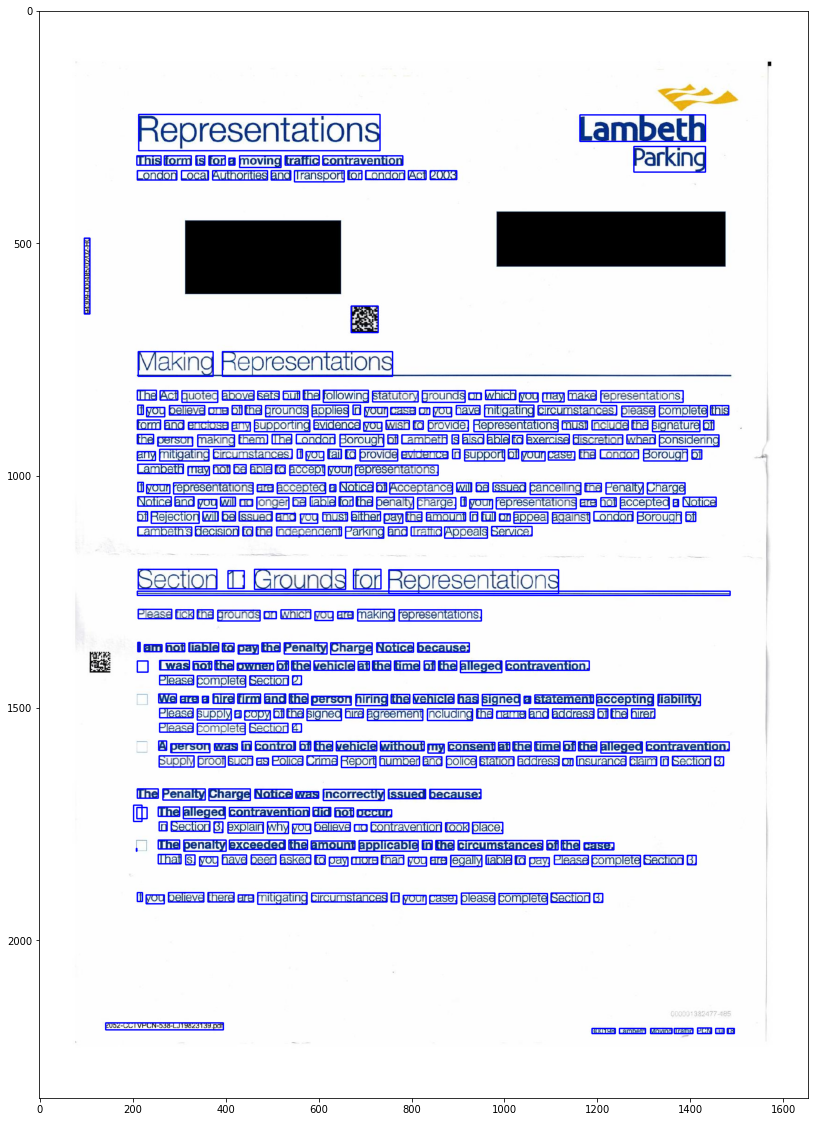

In [27]:
fig, axs = plt.subplots(1 , figsize=(20,20))
axs.imshow(plt_format(image))

In [28]:
paragraphs = data.groupby(['block_num','par_num'])['text'].apply(' '.join).reset_index()
#paragraphs

In [29]:
paragraph_left = data.groupby(['block_num','par_num'])['left'].agg('min').reset_index()
paragraph_top = data.groupby(['block_num','par_num'])['top'].agg('min').reset_index()
paragraph_bottom = data.groupby(['block_num','par_num'])['bottom'].agg('max').reset_index()
#paragraph_boxes
#df1.groupby(['State','Product'])['Sales'].agg('max').reset_index()


In [30]:
#paragraph_line_width = data.groupby(['block_num','par_num','line_num'])['left'+'width'].agg('sum').reset_index()
#paragraph_line_width.head(5)

In [31]:
paragraph_para_right = data.groupby(['block_num','par_num'])['right'].agg('max').reset_index()
paragraph_para_right.head(4)

block_num  par_num  right
0          1        1    109
1          2        1    396
2          3        1   1433
3          4        1   1433

In [32]:
paragraph_line_height = data.groupby(['block_num','par_num','line_num'])['height'].agg('max').reset_index()
paragraph_para_height = paragraph_line_height.groupby(['block_num','par_num'])['height'].agg('sum').reset_index()
paragraph_para_height.head(5)

block_num  par_num  height
0          1        1     163
1          2        1      15
2          3        1      78
3          4        1      79
4          5        1     110

In [33]:
df = paragraph_left
#df = df.join(paragraph_top,lsuffix='_caller', rsuffix='_other')
#df1 = df.set_index('block_num').join(paragraph_top.set_index('block_num'))
df = df.merge(paragraph_top, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_para_right, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_para_height, on=['block_num','par_num'], how='left')
df = df.merge(paragraph_bottom, on=['block_num','par_num'], how='left')
#df = df.join(paragraph_para_width)
#df = df.join(paragraph_para_height)
df.head(4)

block_num  par_num  left   top  right  height  bottom
0          1        1    97   490    109     163     653
1          2        1   143  2177    396      15    2192
2          3        1   214   224   1433      78     302
3          4        1   210   293   1433      79     369

In [34]:
filename = path2image
#image = cv2.imread(filename)
for index, row in df.iterrows():
    #print(row['c1'], row['c2'])
    # draw the bounding boxes on the image
    # Start coordinate, here (5, 5)
    # represents the top left corner of rectangle
    start_point = ( row['left'],row['top'])
    
    # Ending coordinate, here (220, 220)
    # represents the bottom right corner of rectangle
    end_point = ( row['right'],row['bottom'])
    print(end_point)  
    # Red color in BGR
    color = (0, 0, 255)
      
    # Line thickness of 2 px
    thickness = 2
      
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

(109, 653)
(396, 2192)
(1433, 302)
(1433, 369)
(760, 787)
(1385, 843)
(1483, 1000)
(1456, 1135)
(1117, 1254)
(951, 1313)
(1486, 1258)
(925, 1385)
(1183, 1455)
(1422, 1557)
(1484, 1628)
(950, 1699)
(997, 1770)
(1413, 1841)
(1212, 1922)
(1495, 2200)


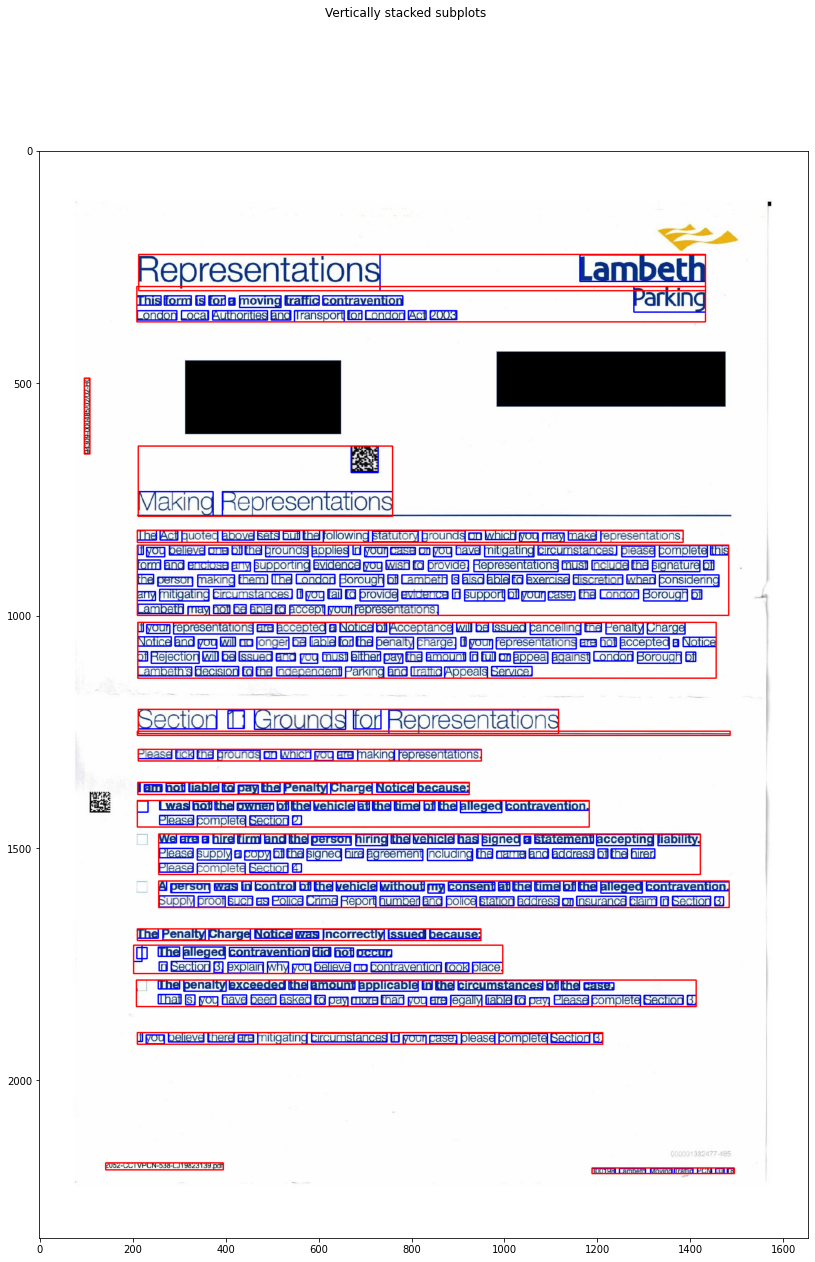

In [35]:
#cv2_plt_imshow(image)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(image))

img = cv2.imread('invoice-sample.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

In [36]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img,lang='eng', config=custom_config)

'Representations lambleth\n(IS fietin is foon & cfigwing IfEfic confravention EH:Eiqg\nCofidon Oooal Aofitfties and [FEspom B Conioch 5 2008\nVaking Bepreseniations\n(I8 A e il SEFS G I8 [lowing stefifry groons on 6o yoo mey, (Eike EofEsaeion:\n1 oo Gelkise one of e goofiGs Bopliss I ppo cass an pro Barb [Mieiog BoafEenoss) feasa copnefa [AS\nirin 69 enoives @y 60R0Ang evidenca yoo RisH b pridis) BEfEsaNETons (M) 0608 Mo sgfEbed -\ne pREON (ABKINg BRem. (e Confn BorofHR of CadieA (5 Bt & fo femiss Bisarsfion when ohisHEing\n&y Mifigaion coaEieTes [ yoo i o pridte Siteits In soffof 6 ppon mes) 8e HonGon BbnaoR 6 .\nAR ey (1 Ge B8 0 800807 yoan ERsaiEmwis\ni yoon EOFEsSlafidns &re enofofed a Nlics ofl RuospiEGs @l Ga ssued offosiing Ge BEdalfy Coarhe\nNafide and ppa @i oo lonien 68 168 oo ife pEGaly ofEmE B poyn epaEEHEons ae il ecofiEd a Mids\n67 Bejeciiion Gl B Issued e~0 poo (061 Eifen pay e adibofi ([ N on appea) afEinst Condon BGmagh of\nOamoAR BecElon fio ife incepeniiani PRfdng an

In [37]:
originalImage = cv2.imread(filename)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

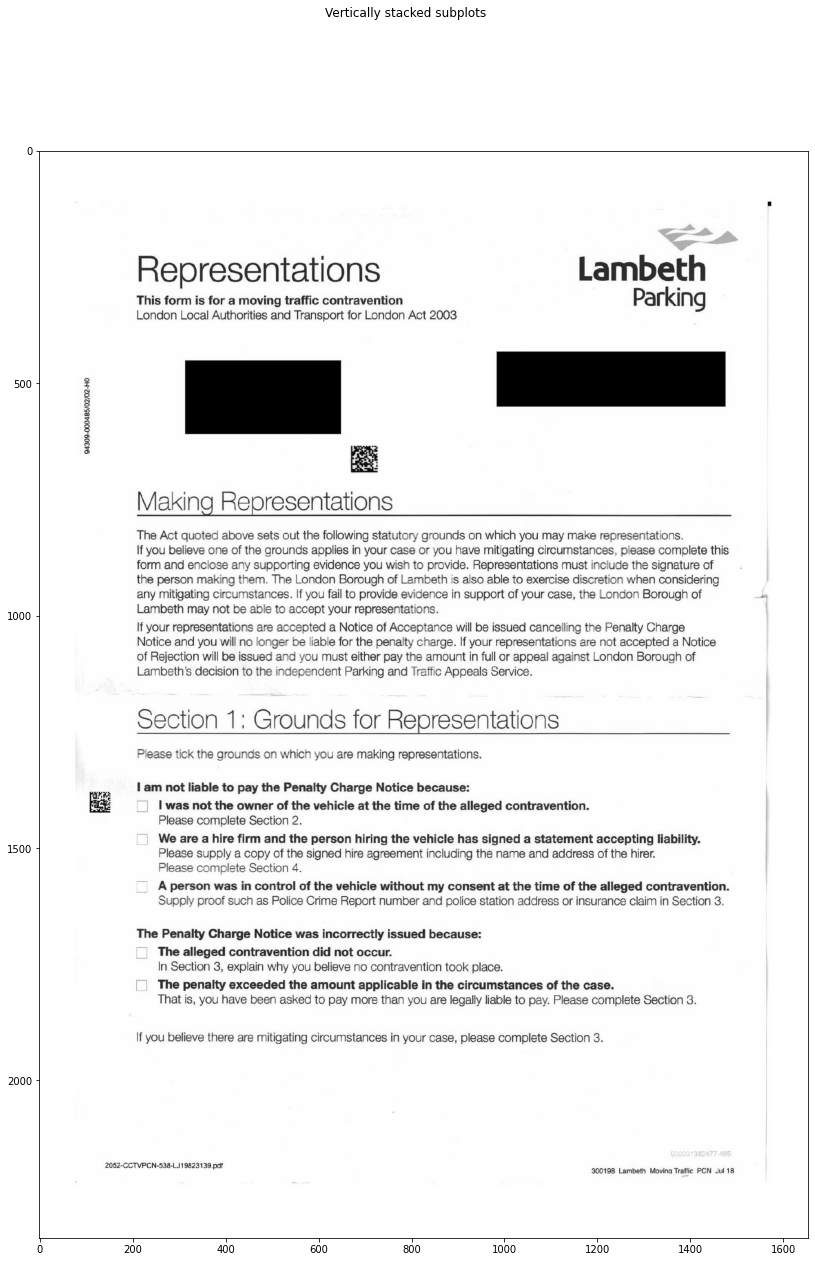

In [38]:

originalImage = cv2.imread(filename)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
#img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
#cv2_plt_imshow(grayImage)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(grayImage))

In [39]:
import re

In [40]:
from pytesseract import Output

filename = path2image
img = cv2.imread(filename)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())
keys

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text']

In [41]:
## Pattern Matching

-1

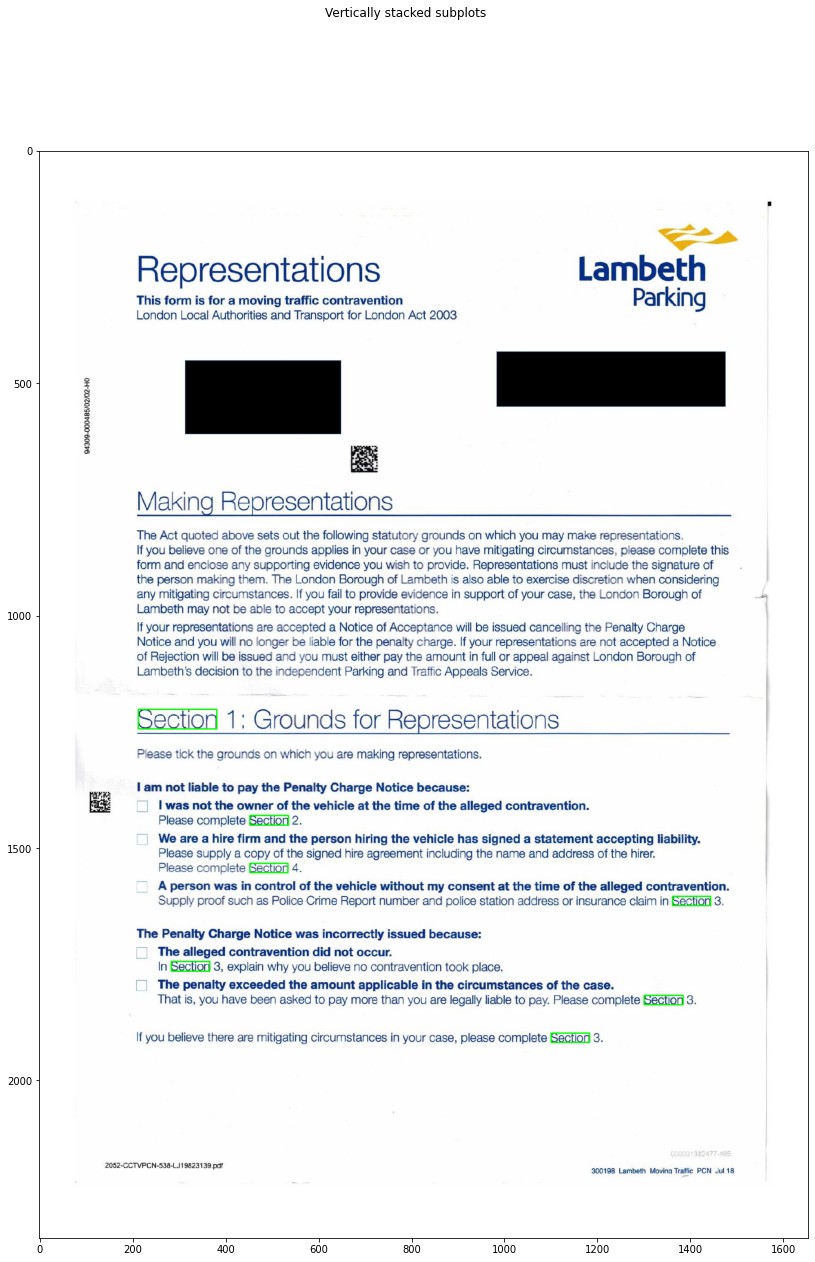

In [42]:

#date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
#^The        matches any string that starts with The -> Try it!
#end$        matches a string that ends with end
#^The end$   exact string match (starts and ends with The end)
#roar        matches any string that has the text roar in it
text_pattern = 'Section'
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	#if re.match(date_pattern, d['text'][i]):
      if re.match(text_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#cv2.imshow('img', img)
#cv2_plt_imshow(img)
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(img))
cv2.waitKey(0)

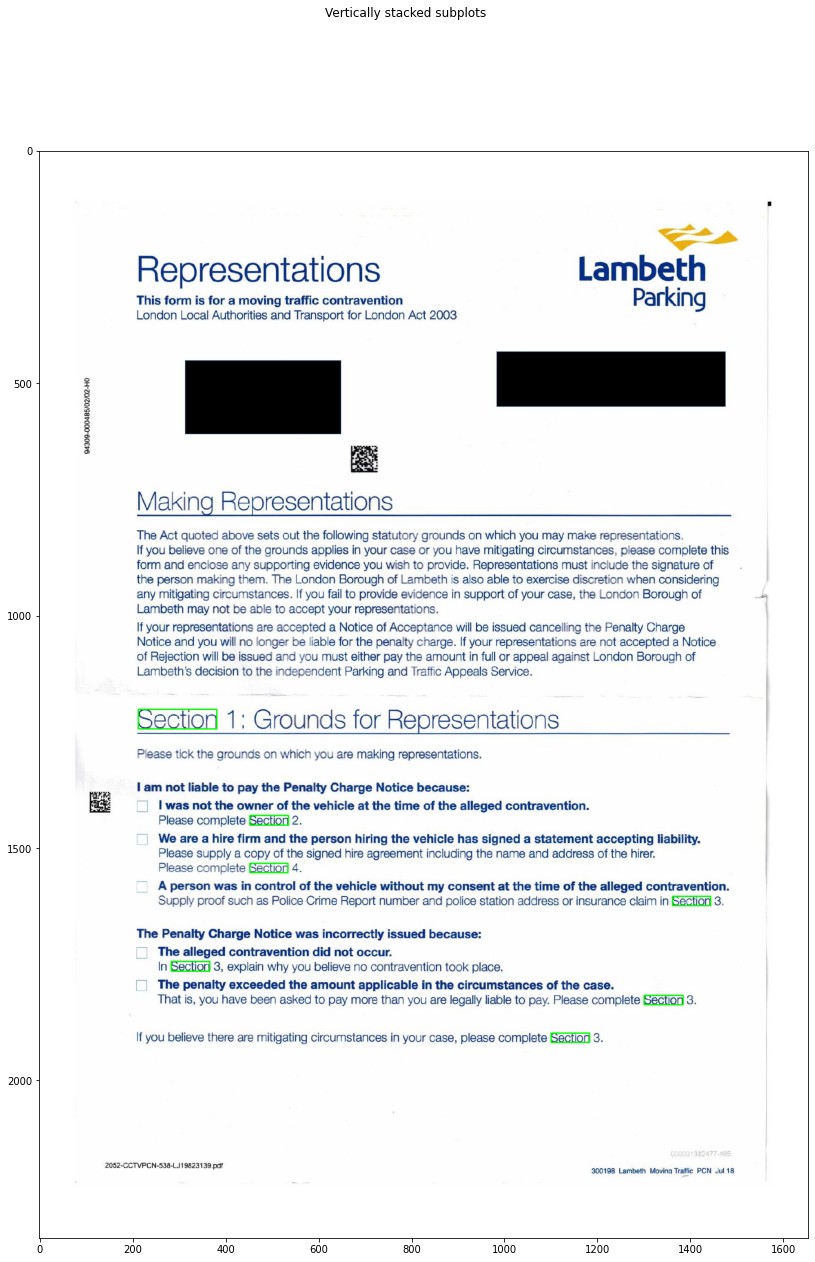

In [43]:
# Convert the image to be suitable for pyplot format and later use it for plotting using pyplot functions
#im2 = cv2.imread('./images/landscape.jpg')
fig, axs = plt.subplots(1 , figsize=(20,20))
fig.suptitle('Vertically stacked subplots')
axs.imshow(plt_format(img))
#axs[1].imshow(plt_format(im2))